## Functions

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np
import pandas as pd

def slope_intercept(x_val, y_val):
    x=np.array(x_val)
    y=np.array(y_val)
    m=(((np.mean(x)*np.mean(y))) - np.mean(x*y)) / ((np.mean(x)*np.mean(x)) - np.mean(x*x))
    m=round(m, 2)
    b=(np.mean(y) - np.mean(x)*m)
    b = round(b, 2)
    return m, b

def target(student):
    return [student[0], student[0]/2, student[0]/4, student[0]/8, student[0]/16, student[0]]

def plot_student(student):
    x = [1, 1/2, 1/4, 1/8, 1/16, 1]
    labels = ["1-norm", "2", "3", "4", "5", "6"]
    diff = np.array(target(student)) * 0.21
    m, b = slope_intercept(x, student)
    reg_line=[(m*i)+b for i in x]

    plt.figure(figsize=(10, 8))
    plt.scatter(x, student, color="r", s = 12)
    plt.plot(x, target(student))
    plt.plot(x, target(student) - diff, linewidth=.3)
    plt.title("Pipetting Accuracy Detection")
    plt.xlabel("Dilution")
    plt.ylabel("Read")
    plt.plot(x, target(student) + diff, linewidth=.3)
    for i in range(len(student)):
        plt.text(x[i] + 0.01, student[i], labels[i])
    plt.show()

def scoring(student, row):
    diff = np.array(target(student)) * 0.21
    student_diff = abs(np.array(student) - np.array(target(student)))
    passes = list(student_diff <= diff)
    df = pd.DataFrame(passes).T
    df.columns = [1, 2, 3, 4, 5, 6]
    df = df.replace({True: 'Pass', False: 'Fail'})
    df = df.rename(index={0: row})
    return df


## Student Data

In [35]:
s1 = [62750, 39613, 18598, 10353, 6788, 60500]
s2 = [62859, 37710,	15034, 6578, 5780, 45633]
s3 = [60168, 25897, 12165, 6585, 5972, 43010]


## Example Output

In [36]:
scoring(s1, "A")

,1,2,3,4,5,6
A,Pass,Fail,Pass,Fail,Fail,Pass


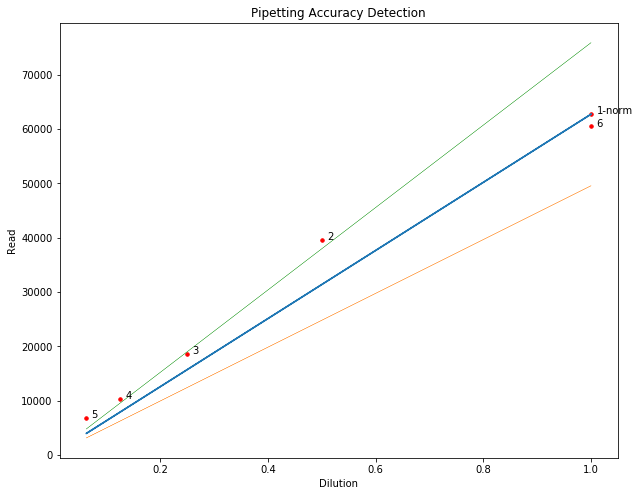

In [37]:
plot_student(s1)